In [1]:
cd("/Users/elfflorin/Documents/Projects/julia.hw/jpie-v0.4")
include("setup.jl")
using brml


Available Demos:

demoBurglar.jl
demoBurglarDictPot.jl
demoBurglarSimple.jl
demoChainIndepRational.jl
demoHMMburglar.jl
demoHMMinferenceFG.jl
demoHMMinferenceSimple.jl
demoHMMlearn.jl
demoMaxProd.jl
demoPlotDAG.jl
demoPotLogArray.jl
demoSumProd.jl
demoSumProdStandardiseVariables.jl


The domain for visible states: $V = \{1, 2, 3, 4, 5\}$  <br/>
The domain for hidden states: $H = \{1, 2, 3, 4, 5, 6, 7, 8, 9, 10\}$ <br/>
The number of timesteps: $T = 20$

In [2]:
V = 5  # number of visible states
H = 10 # number of hidden states
T = 20 # number of timesteps

20

Initialize the time-series vectors **h, v** for the hidden and visible variables

In [3]:
h = zeros(Integer,1,T) # holds the state value for the hidden variable at a specific timestep
v = zeros(Integer,1,T) # holds the state value for the visible variable at a specific timestep

1x20 Array{Integer,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

The probabilities for the hidden variable states at timestep 1: $p(h_{1})$ 

In [4]:
ph1 = condp(rand(H,1)) # probabilities for the states of the hidden variable at timestep 1

10x1 Array{Float64,2}:
 0.119668  
 0.115798  
 0.113779  
 0.00521127
 0.111174  
 0.0551323 
 0.016168  
 0.103553  
 0.190585  
 0.168931  

Initialize the transition matrix **$phghm_{10x10}$** with
$$\begin{eqnarray}
  phghm(i, j) = p(h_t = i | h_{t-1} = j) \\
  \sum_{i = 1}^{10} phghm(i, j) = 1
 \end{eqnarray}
$$

In [5]:
phghm=condp(eye(H,H)) # transition matrix with sum(phghm, 1) = 1 with phghm[i, j] = p(hg=i | hm=j)
# shuffle the column data in phghm while keeping sum(phghm, 1) = 1
# done as below no 2 columns have value 1.0 on the same row
phghmtmp=condp(eye(H,H))
r = randperm(H)
for (i, value) in enumerate(r)
    phghm[:, i] = phghmtmp[:, value]
end
phghm

10x10 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

Initialize the emission matrix **$pvgh \in R^{5x10}$** with
$$\begin{eqnarray}
  pvgh(i, j) = p(v_t = i | h_{t} = j) \\
  \sum_{i = 1}^{5} pvgh(i, j) = 1
 \end{eqnarray}
$$

In [6]:
pvgh=condp((rand(V,H))) # emision matrix with sum(pvgh, 1) = 1 with pvgh[i, j] = p(vg = i | h = j)

5x10 Array{Float64,2}:
 0.0497173  0.00971331  0.375005   …  0.287064   0.13402     0.089965
 0.223909   0.34456     0.181126      0.145269   0.256912    0.225578
 0.215437   0.220242    0.205583      0.0751164  0.268326    0.211817
 0.24717    0.0528517   0.0226471     0.338549   0.336161    0.367161
 0.263767   0.372633    0.215639      0.154002   0.00458047  0.105478

In [7]:
h[1]=randgen(ph1) # initialize the hidden variable @t=1 with a random state based on ph1 distribution
v[1]=randgen(pvgh[:,h[1]]) # initialize the visible variable @t=1 with a random state based on pvgh( vg | h@t=1)

for t=2:T
    h[t]=randgen(phghm[:,h[t-1]]) # set the hidden variable state @t based on h@t-1 using the transition matrix
    v[t]=randgen(pvgh[:,h[t]]) # set the visible variable state @t based on h@t using the emission matrix
end

In [8]:
(alpha, loglik) = HMMforward(v, phghm, ph1, pvgh); # filtering
println("Log Likelihood = $loglik")

Log Likelihood = -28.374464749133278


In [9]:
gamma = HMMsmooth(v, phghm, ph1, pvgh, alpha); # smoothing

10x20 Array{Float64,2}:
 4.3189e-5    1.24647e-7   8.06147e-6   …  8.06147e-6   1.39984e-6 
 1.39984e-6   4.3189e-5    1.24647e-7      1.24647e-7   8.06147e-6 
 0.99957      3.34372e-9   7.70298e-8      0.99957      3.34372e-9 
 7.70298e-8   0.99957      3.34372e-9      7.70298e-8   0.99957    
 3.34372e-9   7.70298e-8   0.99957         3.34372e-9   7.70298e-8 
 8.06147e-6   1.39984e-6   4.3189e-5    …  4.3189e-5    1.24647e-7 
 4.0098e-7    0.000203892  4.0098e-7       4.0098e-7    0.000203892
 0.000203892  4.0098e-7    0.000203892     0.000203892  4.0098e-7  
 1.24647e-7   8.06147e-6   1.39984e-6      1.39984e-6   4.3189e-5  
 0.00017332   0.00017332   0.00017332      0.00017332   0.00017332 

In [10]:
(maxstate, logprob) = HMMviterbi(v, phghm, ph1, pvgh)
println("most likely path (viterbi):")
println(maxstate)

most likely path (viterbi):
[3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4]


In [11]:
println("original path (hidden states):")
println(h)

original path (hidden states):
Integer[3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4 5 3 4]


In [12]:
println("original path (visible states):")
println(v)

original path (visible states):
Integer[5 4 3 2 4 2 5 3 1 5 4 1 5 3 2 3 3 3 1 5]


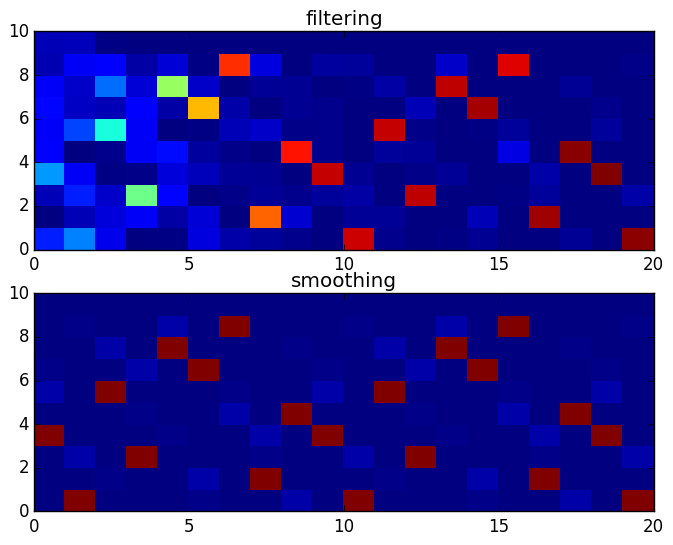

PyObject <matplotlib.collections.PolyCollection object at 0x101ff6ed0>

In [17]:
PyPlot.figure()
ax = PyPlot.subplot(2, 1, 1)
ax[:set_title]("filtering")
PyPlot.pcolor(alpha)
ax = PyPlot.subplot(2, 1, 2)
ax[:set_title]("smoothing")
PyPlot.pcolor(gamma)